 # ANALYSIS

In [1]:
!pip install pymysql --upgrade --force-reinstall

  Using cached PyMySQL-1.1.1-py3-none-any.whl.metadata (4.4 kB)
Using cached PyMySQL-1.1.1-py3-none-any.whl (44 kB)
  Attempting uninstall: pymysql
    Found existing installation: PyMySQL 1.1.1
    Uninstalling PyMySQL-1.1.1:
      Successfully uninstalled PyMySQL-1.1.1


In [19]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import urllib.parse
from dotenv import load_dotenv
import os

load_dotenv()
raw_password = os.getenv("DB_PASSWORD")
password = urllib.parse.quote_plus(raw_password)


In [27]:
from sqlalchemy import create_engine

user = "root"
host = "localhost"
port = 3306
database = "student_migration"

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")


In [28]:
query = "SELECT * FROM student_migration"

df = pd.read_sql(query , engine)
print(df)

     ï»¿student_id origin_country destination_country  destination_city  \
0           S00001        Finland              Russia            Moscow   
1           S00002             UK             Germany            Aachen   
2           S00003        Ireland              Canada         Vancouver   
3           S00004            UAE                  UK        Birmingham   
4           S00005   South Africa             Germany         Stuttgart   
...            ...            ...                 ...               ...   
4995        S04996         Canada             Germany         Stuttgart   
4996        S04997          India             Ireland          Maynooth   
4997        S04998             UK               India         Bangalore   
4998        S04999        Germany              Russia  Saint Petersburg   
4999        S05000        Finland             Germany         Stuttgart   

                        university_name              course_name  \
0     Lomonosov Moscow State Un

# Data Cleaning

In [29]:
df.isnull().sum()

ï»¿student_id                0
origin_country               0
destination_country          0
destination_city             0
university_name              0
course_name                  0
field_of_study               0
year_of_enrollment           0
scholarship_received         0
enrollment_reason            0
graduation_year              0
placement_status             0
placement_country            0
placement_company            0
starting_salary_usd          0
gpa_or_score                 0
visa_status                  0
post_graduation_visa         0
language_proficiency_test    0
test_score                   0
dtype: int64

In [32]:
df = pd.read_csv("student_migration.csv", na_values=["N/A", "NA", "-", "None", "null"])
df

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,Canada,Germany,Stuttgart,University of Stuttgart,Political Science,Engineering,2023,No,Scholarship,2024,Placed,Germany,Facebook,98568,3.96,Tier 4,Post-Study Visa,Duolingo,6.9
4996,S04997,India,Ireland,Maynooth,Maynooth University,Political Science,Law,2023,Yes,Quality of Life,2026,Placed,Ireland,Deloitte,32643,3.93,F1,PSW,TOEFL,7.5
4997,S04998,UK,India,Bangalore,IISc Bangalore,Finance,Natural Sciences,2023,Yes,Scholarship,2026,Placed,India,Tesla,100777,3.76,Study Permit,Post-Study Visa,TOEFL,8.8
4998,S04999,Germany,Russia,Saint Petersburg,Saint Petersburg State University,Biotechnology,Business,2020,Yes,Scholarship,2022,Not Placed,NaN,NaN,0,3.72,Schengen Student Visa,Blue Card,IELTS,8.6


In [30]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [7]:
df.shape

(5000, 20)

In [8]:
df = df[df['placement_company'] != 'N/A']

In [9]:
df

,ï»¿student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,None,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2
7,S00008,UAE,UK,Cambridge,University of Cambridge,Finance,Law,2023,No,Job Opportunities,2024,Placed,UK,Facebook,98247,3.53,Student Visa,Work Permit,IELTS,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,S04995,Canada,UK,London,UCL,Political Science,Arts,2021,No,Scholarship,2023,Placed,UK,Microsoft,46920,2.52,J1,OPT,TOEFL,5.7
4995,S04996,Canada,Germany,Stuttgart,University of Stuttgart,Political Science,Engineering,2023,No,Scholarship,2024,Placed,Germany,Facebook,98568,3.96,Tier 4,Post-Study Visa,Duolingo,6.9
4996,S04997,India,Ireland,Maynooth,Maynooth University,Political Science,Law,2023,Yes,Quality of Life,2026,Placed,Ireland,Deloitte,32643,3.93,F1,PSW,TOEFL,7.5
4997,S04998,UK,India,Bangalore,IISc Bangalore,Finance,Natural Sciences,2023,Yes,Scholarship,2026,Placed,India,Tesla,100777,3.76,Study Permit,Post-Study Visa,TOEFL,8.8


In [10]:
df = df[df['placement_country'] != 'N/A']
df

,ï»¿student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,None,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2
7,S00008,UAE,UK,Cambridge,University of Cambridge,Finance,Law,2023,No,Job Opportunities,2024,Placed,UK,Facebook,98247,3.53,Student Visa,Work Permit,IELTS,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,S04995,Canada,UK,London,UCL,Political Science,Arts,2021,No,Scholarship,2023,Placed,UK,Microsoft,46920,2.52,J1,OPT,TOEFL,5.7
4995,S04996,Canada,Germany,Stuttgart,University of Stuttgart,Political Science,Engineering,2023,No,Scholarship,2024,Placed,Germany,Facebook,98568,3.96,Tier 4,Post-Study Visa,Duolingo,6.9
4996,S04997,India,Ireland,Maynooth,Maynooth University,Political Science,Law,2023,Yes,Quality of Life,2026,Placed,Ireland,Deloitte,32643,3.93,F1,PSW,TOEFL,7.5
4997,S04998,UK,India,Bangalore,IISc Bangalore,Finance,Natural Sciences,2023,Yes,Scholarship,2026,Placed,India,Tesla,100777,3.76,Study Permit,Post-Study Visa,TOEFL,8.8


In [11]:
## Popular destination Countries

In [12]:
query = "SELECT destination_country, COUNT(*) AS country_count FROM student_migration GROUP BY destination_country ORDER BY country_count DESC"

df_dest_count = pd.read_sql(query , engine)
print(df_dest_count)

  destination_country  country_count
0                 UAE            538
1                  UK            526
2             Germany            518
3              Russia            515
4        South Africa            496
5               India            493
6                 USA            485
7              Canada            483
8             Finland            474
9             Ireland            472


In [13]:
# Origin Countries

In [14]:
query = "SELECT origin_country, COUNT(*) AS country_count FROM student_migration GROUP BY origin_country ORDER BY country_count DESC"

df_origin_count = pd.read_sql(query , engine)
print(df_origin_count)

  origin_country  country_count
0         Russia            532
1        Germany            531
2         Canada            517
3        Ireland            510
4            USA            504
5             UK            499
6          India            498
7   South Africa            493
8        Finland            465
9            UAE            451


In [15]:
# Courses in demand

In [16]:
query = "SELECT course_name , COUNT(*) AS No_of_students FROM student_migration GROUP BY course_name ORDER  BY No_of_students DESC"

df_course_name = pd.read_sql(query , engine)
print(df_course_name)

                course_name  No_of_students
0              Data Science             369
1         Political Science             358
2                    Design             345
3    Electrical Engineering             339
4                       Law             337
5                Psychology             337
6         Civil Engineering             335
7    Mechanical Engineering             335
8              Architecture             335
9          Computer Science             330
10                  Finance             326
11  Business Administration             321
12                 Medicine             320
13                Economics             311
14            Biotechnology             302


In [17]:
# Field of study in demand

In [18]:
query = "SELECT field_of_study , COUNT(*) AS count_of_students FROM student_migration GROUP BY field_of_study ORDER BY count_of_students DESC"

df_study_field = pd.read_sql(query , engine)
print(df_study_field)

     field_of_study  count_of_students
0   Social Sciences                645
1          Business                636
2       Engineering                634
3               Law                633
4  Computer Science                630
5  Natural Sciences                629
6              Arts                600
7          Medicine                593


In [19]:
# Yearwise Migration

In [20]:
query = "SELECT year_of_enrollment , COUNT(year_of_enrollment) AS No_of_students FROM student_migration GROUP BY year_of_enrollment"

df_year_of_enrollment = pd.read_sql(query , engine)
print(df_year_of_enrollment)

   year_of_enrollment  No_of_students
0                2021             963
1                2023            1014
2                2019            1004
3                2020             992
4                2022            1027


In [21]:
# count of scholarship Received

In [22]:
query = "SELECT scholarship_received , COUNT(*) AS Students FROM student_migration GROUP BY scholarship_received"

df_scholarship = pd.read_sql(query , engine)
print(df_scholarship)

  scholarship_received  Students
0                   No      2423
1                  Yes      2577


In [23]:
# No of Universities in a city

In [24]:
query = "SELECT destination_city , COUNT(DISTINCT university_name) AS university_count FROM student_migration GROUP BY destination_city ORDER BY university_count DESC LIMIT 10"

df_university_count = pd.read_sql(query , engine)
print(df_university_count)

  destination_city  university_count
0            Dubai                 4
1           Dublin                 4
2           London                 4
3           Moscow                 4
4            Delhi                 3
5        Abu Dhabi                 2
6           Berlin                 2
7           Boston                 2
8     Johannesburg                 2
9           Munich                 2


In [25]:
# No of placements in a company

In [26]:
query = "SELECT placement_company , COUNT(*) AS No_of_students FROM student_migration WHERE placement_company NOT IN ('N/A', '', 'NA') GROUP BY placement_company"

df_placement = pd.read_sql(query , engine)
print(df_placement)

   placement_company  No_of_students
0          Microsoft             220
1             Google             203
2              Apple             195
3                IBM             183
4           Facebook             187
5           McKinsey             187
6            Siemens             181
7              Intel             189
8           Deloitte             190
9             Amazon             212
10               SAP             184
11             Tesla             193
12     Goldman Sachs             185


In [27]:
# Average Salary of Companies

In [28]:
query = "SELECT placement_company , AVG(starting_salary_usd) AS Average_salary FROM student_migration WHERE placement_company NOT IN ('N/A', '', 'NA') GROUP BY placement_company ORDER BY Average_salary DESC"

df_salary = pd.read_sql(query , engine)
print(df_salary)

   placement_company  Average_salary
0              Intel      93425.2593
1              Apple      93112.1846
2            Siemens      92735.7901
3             Amazon      91870.1226
4                IBM      89481.3443
5                SAP      88851.3587
6          Microsoft      87723.6273
7           Facebook      87301.3690
8           Deloitte      87296.8579
9           McKinsey      87274.2246
10     Goldman Sachs      86034.5081
11             Tesla      85051.8705
12            Google      84238.3892


In [29]:
# Enrollment Reason

In [30]:
query = "SELECT enrollment_reason , COUNT(*) AS Count_of_students FROM student_migration GROUP BY enrollment_reason"

df_reason = pd.read_sql(query , engine)
print(df_reason)

     enrollment_reason  Count_of_students
0       Higher Ranking               1004
1    Job Opportunities                991
2          Scholarship               1001
3      Quality of Life               1015
4  Political Stability                989


In [31]:
# TOP 5 Universities with highest gpa or score

In [32]:
query = "SELECT university_name , MAX(gpa_or_score) AS gpa FROM student_migration GROUP BY university_name ORDER BY gpa DESC LIMIT 5"

df_gpa = pd.read_sql(query , engine)
print(df_gpa)

                university_name  gpa
0                    IIT Bombay  4.0
1                   RWTH Aachen  4.0
2                          UCLA  4.0
3         University of Chicago  4.0
4  Novosibirsk State University  4.0


In [33]:
df = pd.read_csv('student_migration.csv')

In [34]:
df

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,Canada,Germany,Stuttgart,University of Stuttgart,Political Science,Engineering,2023,No,Scholarship,2024,Placed,Germany,Facebook,98568,3.96,Tier 4,Post-Study Visa,Duolingo,6.9
4996,S04997,India,Ireland,Maynooth,Maynooth University,Political Science,Law,2023,Yes,Quality of Life,2026,Placed,Ireland,Deloitte,32643,3.93,F1,PSW,TOEFL,7.5
4997,S04998,UK,India,Bangalore,IISc Bangalore,Finance,Natural Sciences,2023,Yes,Scholarship,2026,Placed,India,Tesla,100777,3.76,Study Permit,Post-Study Visa,TOEFL,8.8
4998,S04999,Germany,Russia,Saint Petersburg,Saint Petersburg State University,Biotechnology,Business,2020,Yes,Scholarship,2022,Not Placed,NaN,NaN,0,3.72,Schengen Student Visa,Blue Card,IELTS,8.6


# Exploratory Data Analysis

In [35]:
df.describe()

,year_of_enrollment,graduation_year,starting_salary_usd,gpa_or_score,test_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2021.011000,2023.017800,44552.531000,3.246820,5.632200
std,1.420733,1.651432,50719.190623,0.430659,2.973838
min,2019.000000,2020.000000,0.000000,2.500000,0.000000
25%,2020.000000,2022.000000,0.000000,2.877500,5.300000
50%,2021.000000,2023.000000,30516.500000,3.240000,6.500000
75%,2022.000000,2024.000000,87838.500000,3.610000,7.800000
max,2023.000000,2026.000000,149932.000000,4.000000,9.000000


In [ ]:
# Top 10 countries sending most students

In [36]:
df_origin = df['origin_country'].value_counts().head(10)


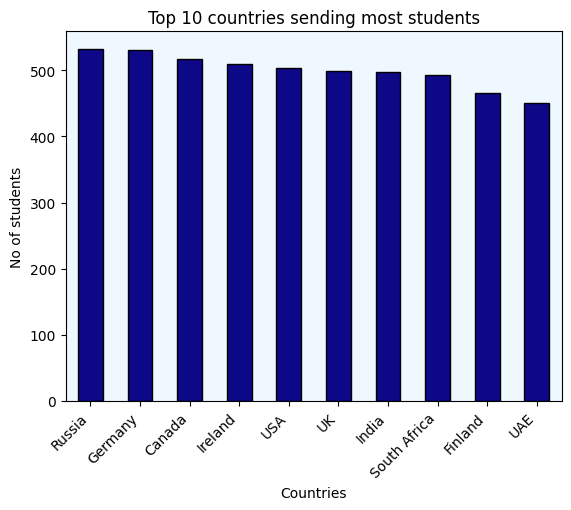

In [37]:
fig, ax = plt.subplots()
ax.set_facecolor('aliceblue')         
df_origin.plot(kind = 'bar'  , edgecolor = 'k' , cmap = 'plasma')
plt.xticks(rotation = 45 , ha = 'right')
plt.xlabel('Countries')
plt.ylabel('No of students')
plt.title("Top 10 countries sending most students")
plt.savefig('fig1.png')
plt.show()

In [ ]:
# Top 10 destination countries

In [38]:
df_destination = df['destination_country'].value_counts().head(10)


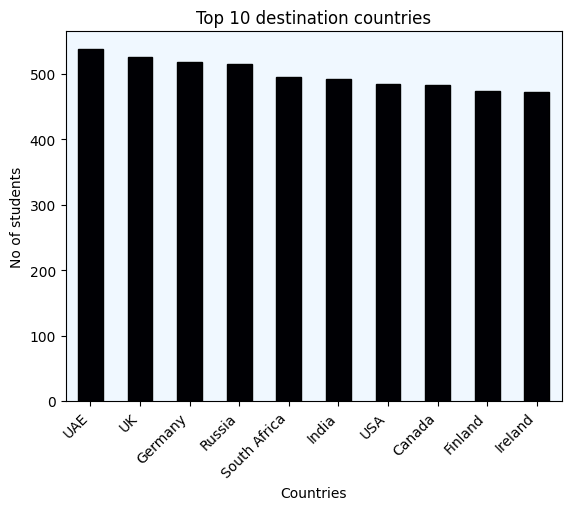

In [39]:
fig, ax = plt.subplots()
ax.set_facecolor('aliceblue')         
df_destination.plot(kind = 'bar' , edgecolor = 'k' , cmap = 'magma')
plt.xticks(rotation = 45 , ha = 'right')
plt.xlabel('Countries')
plt.ylabel('No of students')
plt.title("Top 10 destination countries")
plt.savefig('fig2.png')
plt.show()

In [ ]:
# Fields in demands

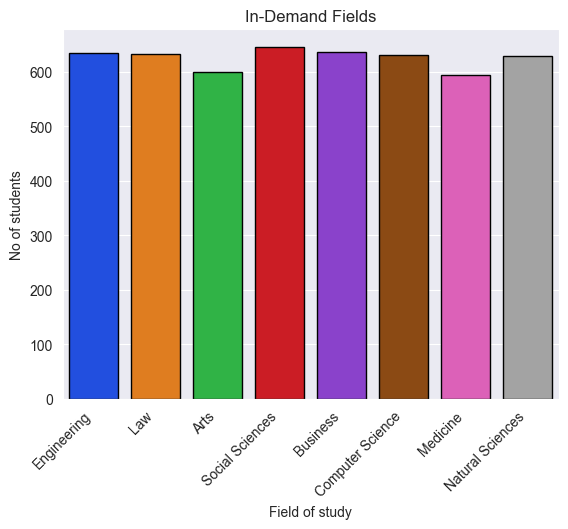

In [40]:
sns.set_style("darkgrid")      
sns.countplot(x = 'field_of_study' , data = df , edgecolor = 'k' , palette = 'bright' , hue = 'field_of_study', legend = False  , orient = 'h')
plt.xticks(rotation = 45 , ha = 'right')
plt.xlabel('Field of study')
plt.ylabel('No of students')
plt.title('In-Demand Fields')
plt.savefig('fig3.png')
plt.show()

In [ ]:
# Top 10 popular courses

In [41]:
df_courses = df['course_name'].value_counts().head(10)


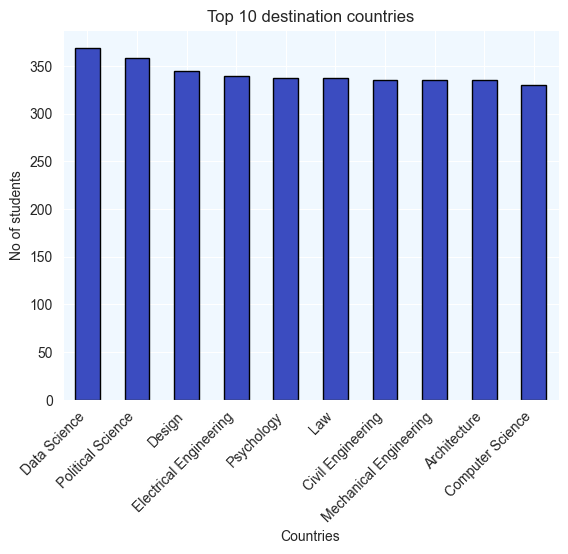

In [42]:
fig, ax = plt.subplots()
ax.set_facecolor('aliceblue')         
df_courses.plot(kind = 'bar' , edgecolor = 'k' ,cmap = 'coolwarm')
plt.xticks(rotation = 45 , ha = 'right')
plt.xlabel('Courses')
plt.ylabel('No of students')
plt.title("Top 10 popular courses")
plt.savefig('fig4.png')
plt.show()

In [72]:
# Types of visa by year of enrollment

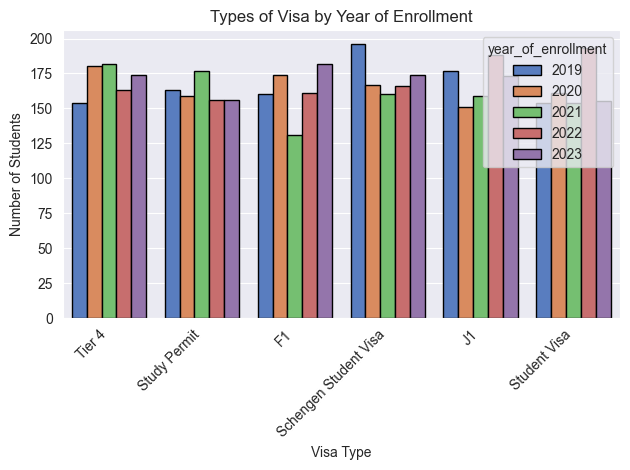

In [43]:
sns.set_style("darkgrid")     # Options: white, dark, whitegrid, darkgrid, ticks
sns.countplot(x='visa_status', data=df, hue='year_of_enrollment', palette='muted', edgecolor='k')
plt.title("Types of Visa by Year of Enrollment")
plt.xlabel("Visa Type")
plt.ylabel("Number of Students")
plt.xticks(rotation=45 , ha = 'right')
plt.tight_layout()
plt.savefig('fig5.png')
plt.show()


In [73]:
# Percantage of scholarship received

In [44]:
df_scholarship = df['scholarship_received'].value_counts()

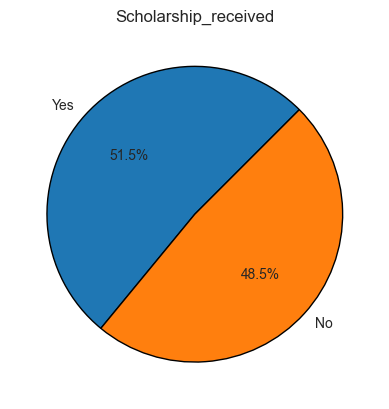

In [45]:
plt.pie(df_scholarship.values , labels = df_scholarship.index ,  startangle = 45 , autopct = '%1.1f%%' , wedgeprops = {'edgecolor' : 'k'})
plt.title('Scholarship_received')
plt.savefig('fig6.png')
plt.show()

In [74]:
# Percentage of enrollment reason

In [46]:
df_enrollment = df['enrollment_reason'].value_counts()

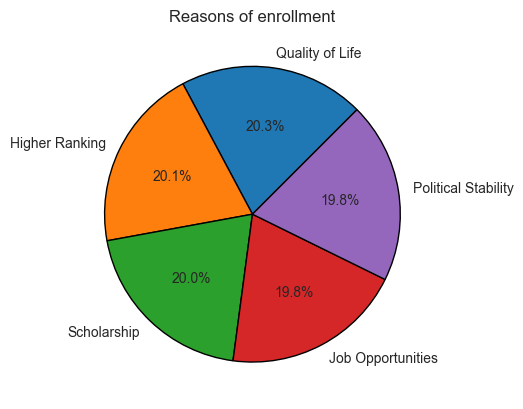

In [47]:
plt.pie(df_enrollment.values , labels = df_enrollment.index ,  startangle = 45 , autopct = '%1.1f%%' , wedgeprops = {'edgecolor' : 'k'})
plt.title('Reasons of enrollment')
plt.savefig('fig7.png')
plt.show()

In [ ]:
# year of graduation

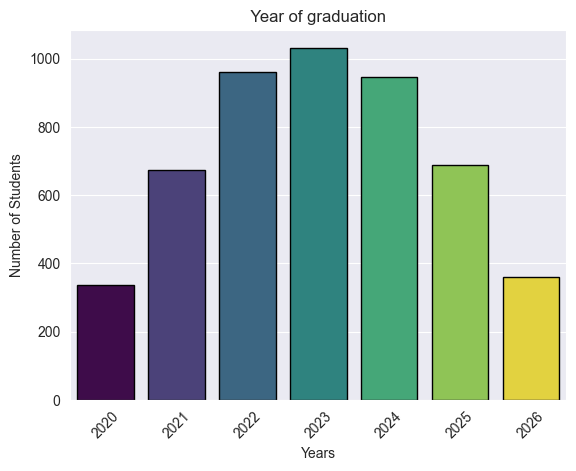

In [48]:
sns.set_style("darkgrid")  
sns.countplot(x='graduation_year',  data=df , color= 'orange' ,edgecolor = 'k' , palette = 'viridis' , hue = 'graduation_year' , legend = False )
plt.title(" Year of graduation ")
plt.xlabel("Years")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.savefig('fig8.png')
plt.show()

In [ ]:
# Top 10 placement countries

In [49]:
df_placement = df['placement_country'].value_counts().head(10)


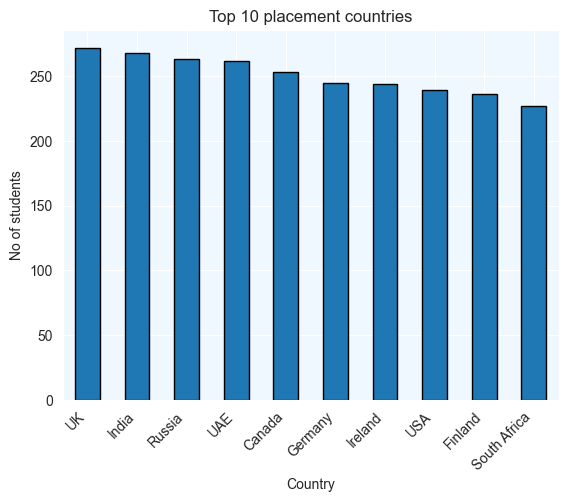

In [50]:
fig, ax = plt.subplots()
ax.set_facecolor('aliceblue')         
df_placement.plot(kind = 'bar' , edgecolor = 'k' , cmap = 'tab10')
plt.xticks(rotation = 45 , ha = 'right')
plt.xlabel('Country')
plt.ylabel('No of students')
plt.title("Top 10 placement countries")
plt.savefig('fig9.png')
plt.show()

In [ ]:
# Top 10 placement companies

In [51]:
df_placement = df['placement_company'].value_counts().head(10)


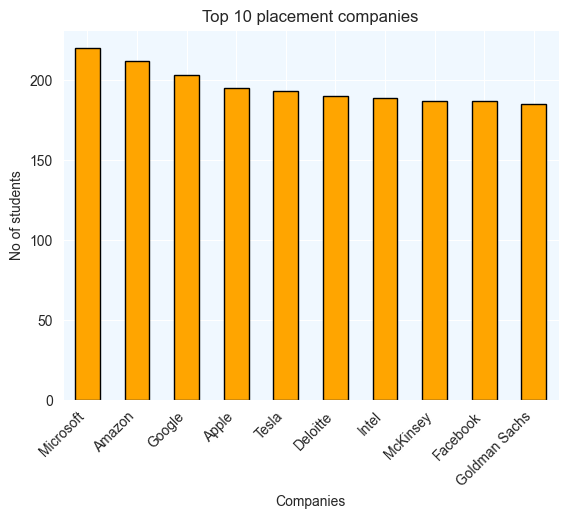

In [52]:
fig, ax = plt.subplots()
ax.set_facecolor('aliceblue')         
df_placement.plot(kind = 'bar'  , edgecolor = 'k' , color = 'orange')
plt.xticks(rotation = 45 , ha = 'right')
plt.xlabel('Companies')
plt.ylabel('No of students')
plt.title("Top 10 placement companies")
plt.savefig('fig10.png')
plt.show()

In [ ]:
# Duration of each course

In [54]:
df['course_duration'] = df['graduation_year'] - df['year_of_enrollment']

In [62]:
df_course = df.groupby('course_name')['course_duration'].mean().reset_index().head(10)

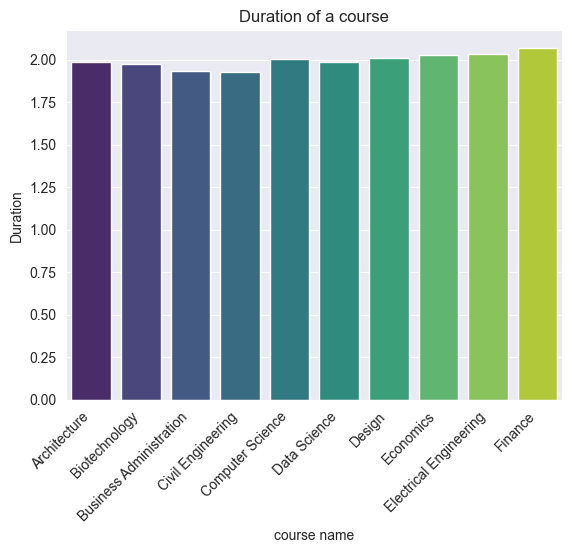

In [71]:
sns.barplot(x ='course_name' , y = 'course_duration' , data = df_course , palette = 'viridis' , hue = 'course_name' , legend = False)
plt.xticks(rotation = 45 , ha = 'right')
plt.xlabel('course name')
plt.ylabel('Duration')
plt.title('Duration of a course')
plt.savefig('fig11.png')
plt.show()